# Monkeypox by country over time

#### Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_grid as altgrid
from altair_saver import save

In [3]:
alt.themes.register("grid", altgrid.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()
alt.renderers.enable("altair_saver", fmts=["vega-lite", "png"])

RendererRegistry.enable('altair_saver')

In [5]:
today = pd.Timestamp.now(tz="America/Los_Angeles").strftime("%Y-%m-%d")
time = pd.Timestamp.now(tz="America/Los_Angeles").strftime("%-I:%M %p")

## Read data

#### Country by county timeseries [via Our World in Data](https://ourworldindata.org/monkeypox)

In [10]:
url = "https://raw.githubusercontent.com/owid/notebooks/main/EdouardMathieu/monkeypox/owid-monkeypox-data.csv"

In [14]:
src = pd.read_csv(url, parse_dates=["date"])

In [45]:
countries = (
    src[src.total_cases_per_million > src.total_cases_per_million.mean()]["location"]
    .unique()
    .tolist()
)

In [46]:
countries

['Andorra',
 'Austria',
 'Belgium',
 'Bermuda',
 'Brazil',
 'Canada',
 'Denmark',
 'Estonia',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Norway',
 'Peru',
 'Portugal',
 'Puerto Rico',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

---

In [47]:
line = (
    alt.Chart(src[src["location"].isin(countries)])
    .mark_line()
    .encode(
        x=alt.X("date:T", axis=alt.Axis(tickCount=5), title=""),
        y=alt.Y("total_cases_per_million:Q", title=" ", axis=alt.Axis(tickCount=5)),
        facet=alt.Facet("location", columns=6),
    )
    .properties(title="total_cases_per_million", width=100, height=100)
    .configure_legend(symbolType="stroke", orient="top")
)

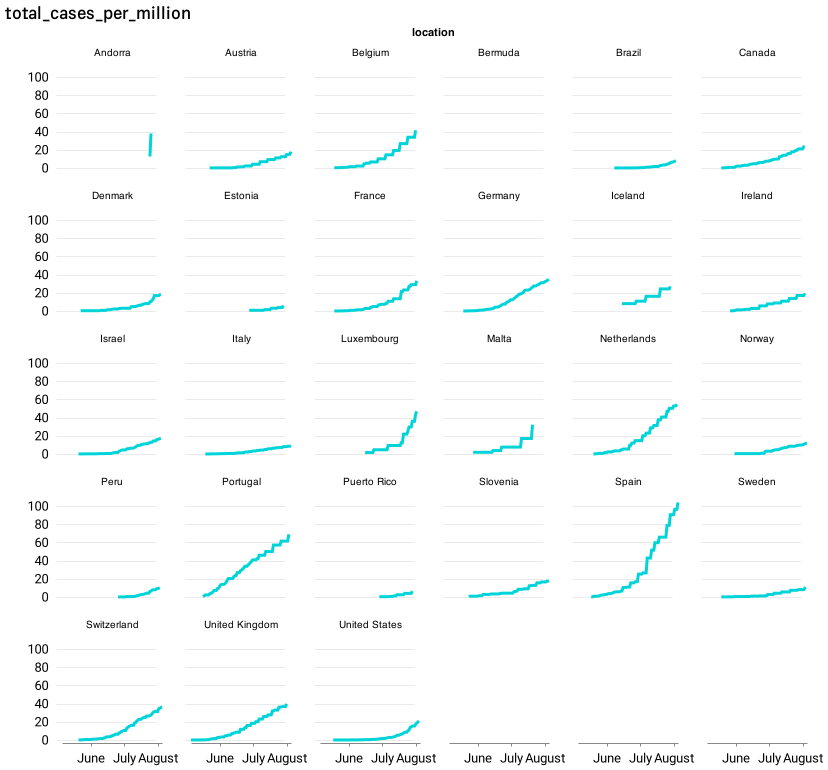

In [48]:
line